# Feature Selection for Application_training data

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
!pwd

/root/shared/Nimish_Student/Applied_Machine_ Learning/Project


## Load Data

In [3]:
files = [ "HCDR/"+f for f in os.listdir("HCDR")]
files
datasets = {}
chunk_size = 10000  # Adjust the chunk size based on your available memory
for f in files:
    name = f.split("/")[1].split('.')[0]
    print(f"loading {name}")
    chunks = pd.read_csv(f, encoding='latin-1', chunksize=chunk_size)
    datasets[name] = pd.concat(chunks, ignore_index=True)
print()    
print(datasets.keys())

loading application_test
loading 
loading HomeCredit_columns_description
loading application_train
loading bureau
loading bureau_balance
loading sample_submission

dict_keys(['application_test', '', 'HomeCredit_columns_description', 'application_train', 'bureau', 'bureau_balance', 'sample_submission'])


## Print Info and Description Summaries of Files

In [4]:
def print_info(df):
    print ("INFO:")
    print(datasets[df].info(verbose=True, null_counts=True))
    print()
    print("DATA DESCRIPTION: ")
    print(datasets[df].describe())
    

In [ ]:
for file_name in datasets.keys(): 
    print(f"File: {file_name}".upper())
    print("--------------------------")
    print_info(file_name)
    print()
    print("*************************************************************************************")
    print()

FILE: APPLICATION_TEST
--------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    48744 non-null  int64  
 1    NAME_CONTRACT_TYPE            48744 non-null  object 
 2    CODE_GENDER                   48744 non-null  object 
 3    FLAG_OWN_CAR                  48744 non-null  object 
 4    FLAG_OWN_REALTY               48744 non-null  object 
 5    CNT_CHILDREN                  48744 non-null  int64  
 6    AMT_INCOME_TOTAL              48744 non-null  float64
 7    AMT_CREDIT                    48744 non-null  float64
 8    AMT_ANNUITY                   48720 non-null  float64
 9    AMT_GOODS_PRICE               48744 non-null  float64
 10   NAME_TYPE_SUITE               47833 non-null  object 
 11   NAME_INCOME_TYPE              48744 non-null  ob

## Feature Selection for application_train: 

### Correlations for Numerical Data

In [1]:
#application_train
train = datasets['application_train']
corrs = pd.DataFrame(train.corr()['TARGET']).rename(columns={"TARGET":"cor"})
corrs["abs_corr"] = corrs.abs()
corrs = corrs.sort_values("cor")
print(corrs)

NameError: name 'datasets' is not defined

In [9]:
# Top Correlated Features
print("10 Most positive correlations to Target:")
print("-------------------------------------------------------")
print(corrs["cor"].tail(10))
print()

print("\n10 Most negative correlations to Target:")
print("-------------------------------------------------------")
print(corrs["cor"].head(10))
print()

print("\n20 Most correlated to Target (by absolute value):")
print("-------------------------------------------------------")
print(corrs.sort_values("abs_corr", ascending=False).head(21))

10 Most positive correlations to Target:
-------------------------------------------------------
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: cor, dtype: float64


10 Most negative correlations to Target:
-------------------------------------------------------
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG              

Other logical numerical variables to consider: 
- 'AMT_INCOME_TOTAL'
- 'AMT_CREDIT'  

Total income, Amount of credit are all impactful factors on a person's likelihood of paying back a loan. 

In [10]:
#Update Numerical Features List to account for Correlation and Logic
selected_num_features = list(corrs.sort_values("abs_corr", ascending=False).head(21).index)
other_num_features = ['AMT_INCOME_TOTAL','AMT_CREDIT']

for feature in other_num_features: 
    selected_num_features.append(feature)

In [11]:
print("Updated Numerical Features: \n")
for col in selected_num_features:
    print(col)
    
print(f"\n# of Updated Numerical Features Based on High Correlation: {len(selected_num_features)}")

Updated Numerical Features: 

TARGET
EXT_SOURCE_3
EXT_SOURCE_2
EXT_SOURCE_1
DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT
DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY
FLAG_EMP_PHONE
DAYS_EMPLOYED
REG_CITY_NOT_LIVE_CITY
FLAG_DOCUMENT_3
FLOORSMAX_AVG
FLOORSMAX_MEDI
FLOORSMAX_MODE
DAYS_REGISTRATION
AMT_GOODS_PRICE
OWN_CAR_AGE
REGION_POPULATION_RELATIVE
AMT_INCOME_TOTAL
AMT_CREDIT

# of Updated Numerical Features Based on High Correlation: 23


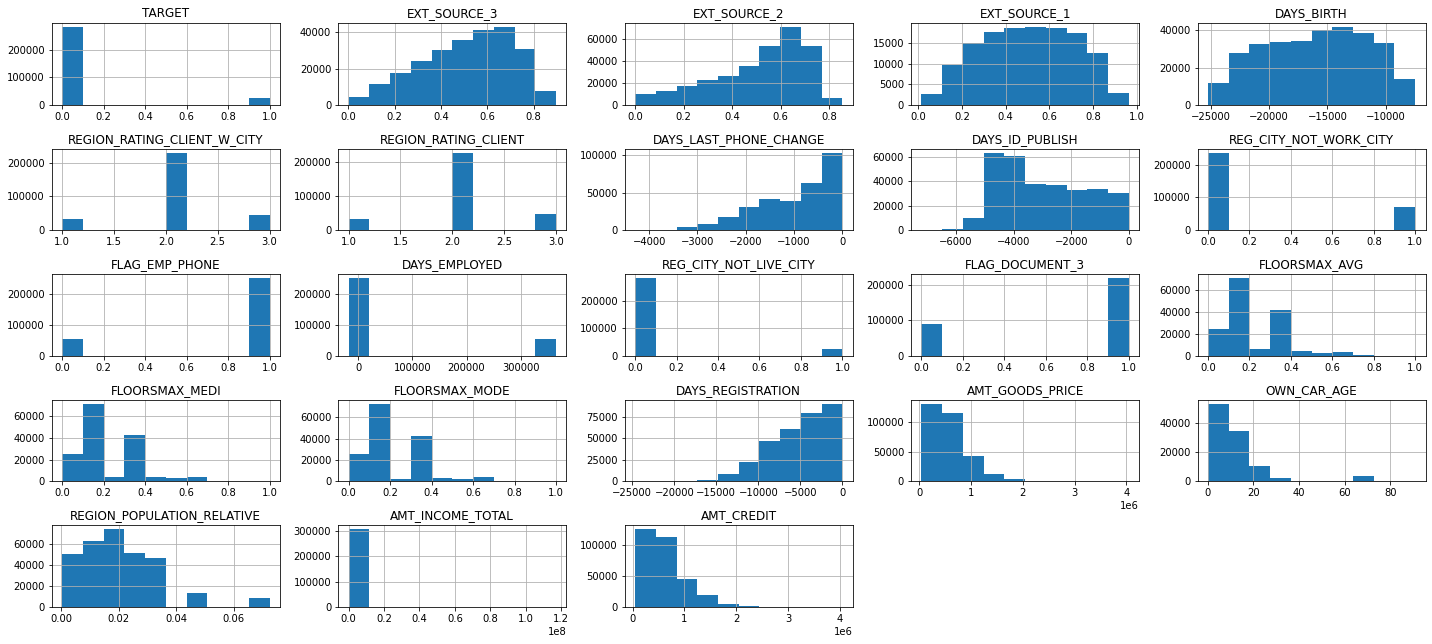

In [12]:
#Distribution Plots of highest correlated input variables. 
# selected_num_features.remove('TARGET')

cnt_cols = len(selected_num_features)

plt.figure(figsize = (20,40))
for i, var in enumerate (selected_num_features):
    plt.subplot(cnt_cols,5, i+1)
    datasets["application_train"][var].hist()
    
    plt.title (var)
    plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Top Correlated Features to Target in application_train')

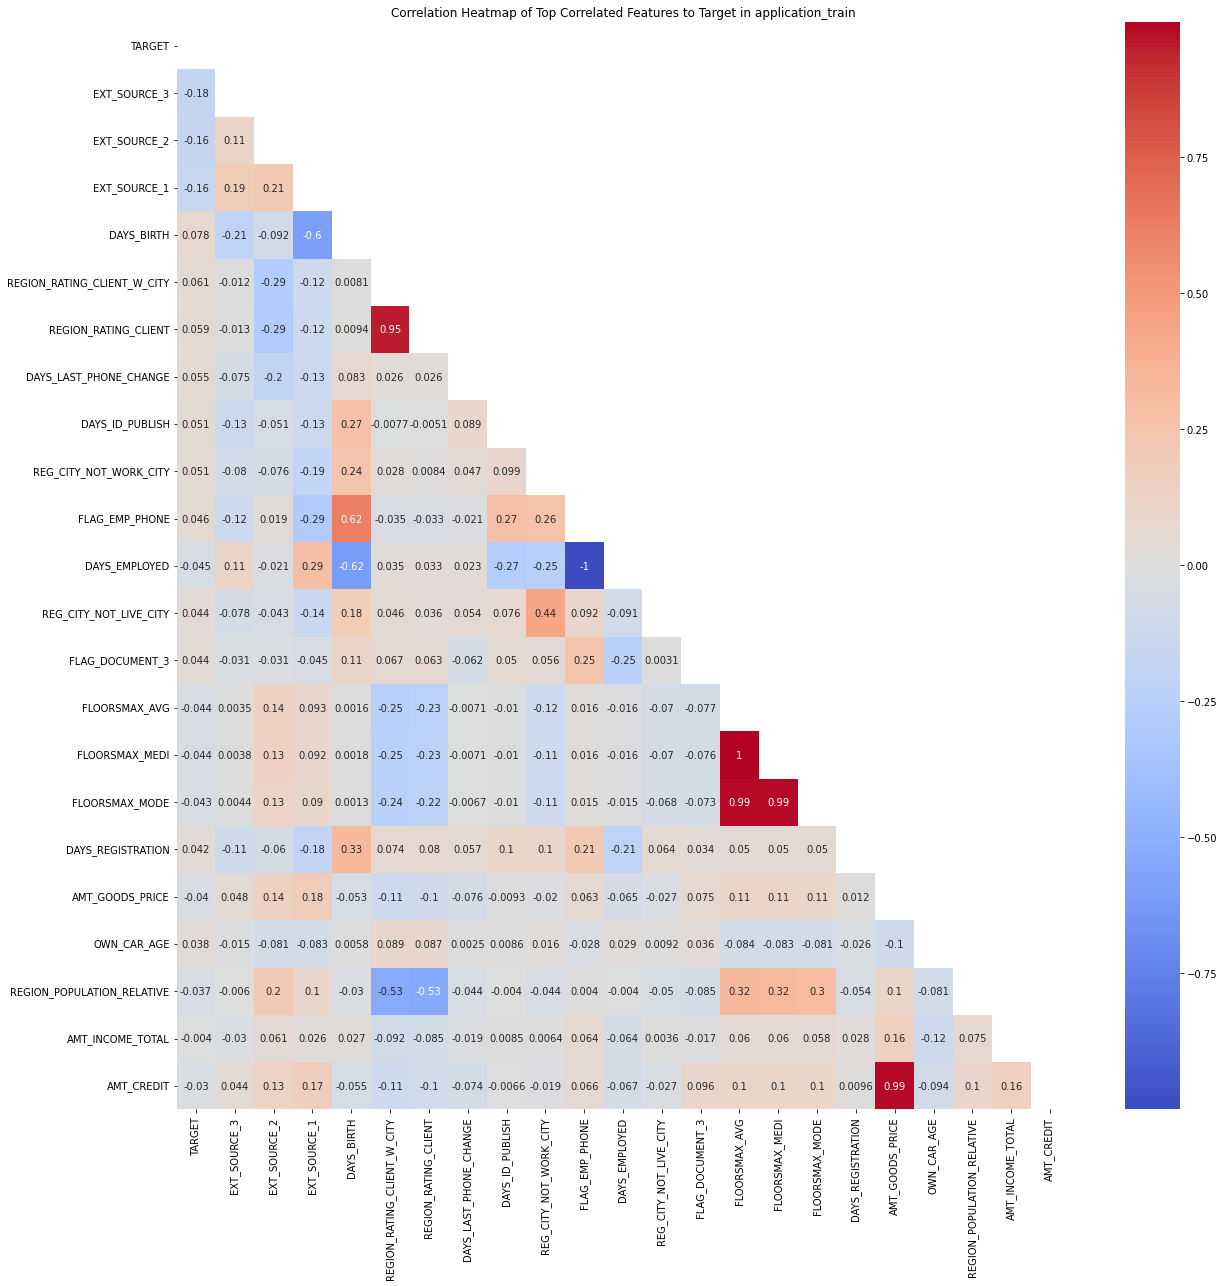

In [13]:
#Correlation Heatmap of top most correlated variables with Target
# selected_num_features.insert(0, 'TARGET')
selected_num_features_df = train[selected_num_features]

#Correlation Matrix
selected_num_features_cm = selected_num_features_df.corr()

#Plot Correlation Matrix as a heatmap
mask = np.triu(selected_num_features_cm)

plt.figure(figsize=(20,20))
sns.heatmap(selected_num_features_cm, cmap=plt.cm.coolwarm, annot=True, mask=mask )
plt.title("Correlation Heatmap of Top Correlated Features to Target in application_train")

In [14]:
# Reference: "https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas".

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr > 0.7]


top_abs_corrs = pd.DataFrame(get_top_abs_correlations(selected_num_features_cm))
print("Absolute Correlations > 0.7 Pearson Coefficent:")
top_abs_corrs.columns = ['Correlation Factor']
print(top_abs_corrs)



Absolute Correlations > 0.7 Pearson Coefficent:
                                                        Correlation Factor
FLAG_EMP_PHONE              DAYS_EMPLOYED                         0.999990
FLOORSMAX_AVG               FLOORSMAX_MEDI                        0.999988
FLOORSMAX_MEDI              FLOORSMAX_MODE                        0.999869
FLOORSMAX_AVG               FLOORSMAX_MODE                        0.999796
AMT_GOODS_PRICE             AMT_CREDIT                            0.999672
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT                  0.998741
                            REGION_POPULATION_RELATIVE            0.881835
REGION_RATING_CLIENT        REGION_POPULATION_RELATIVE            0.879633
DAYS_BIRTH                  FLAG_EMP_PHONE                        0.875040
                            DAYS_EMPLOYED                         0.873051
EXT_SOURCE_1                DAYS_BIRTH                            0.869270
REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY  

In [15]:
top_abs_corrs ['Feature 1 Correlation with Target']=0
top_abs_corrs ['Feature 2 Correlation with Target']=0
i=0

for feature in top_abs_corrs.index:
    top_abs_corrs ['Feature 1 Correlation with Target'].iloc[i] = selected_num_features_cm['TARGET'].loc[feature[0]]
    top_abs_corrs ['Feature 2 Correlation with Target'].iloc[i] = selected_num_features_cm['TARGET'].loc[feature[1]]
    i+=1


In [16]:
top_abs_corrs

Correlation Factor  \
FLAG_EMP_PHONE              DAYS_EMPLOYED                         0.999990   
FLOORSMAX_AVG               FLOORSMAX_MEDI                        0.999988   
FLOORSMAX_MEDI              FLOORSMAX_MODE                        0.999869   
FLOORSMAX_AVG               FLOORSMAX_MODE                        0.999796   
AMT_GOODS_PRICE             AMT_CREDIT                            0.999672   
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT                  0.998741   
                            REGION_POPULATION_RELATIVE            0.881835   
REGION_RATING_CLIENT        REGION_POPULATION_RELATIVE            0.879633   
DAYS_BIRTH                  FLAG_EMP_PHONE                        0.875040   
                            DAYS_EMPLOYED                         0.873051   
EXT_SOURCE_1                DAYS_BIRTH                            0.869270   
REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY                0.738171   

                                                        Feature 1 Correlation with Target  \
FLAG_EMP_PHONE              DAYS_EMPLOYED                                        0.045982   
FLOORSMAX_AVG               FLOORSMAX_MEDI                                      -0.044003   
FLOORSMAX_MEDI              FLOORSMAX_MODE                                      -0.043768   
FLOORSMAX_AVG               FLOORSMAX_MODE                                      -0.044003   
AMT_GOODS_PRICE             AMT_CREDIT                                          -0.039645   
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT                                 0.060893   
                            REGION_POPULATION_RELATIVE                           0.060893   
REGION_RATING_CLIENT        REGION_POPULATION_RELATIVE                           0.058899   
DAYS_BIRTH                  FLAG_EMP_PHONE                                       0.078239   
                            DAYS_EMPLOYED                                        0.078239   
EXT_SOURCE_1                DAYS_BIRTH                                          -0.155317   
REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY                               0.050994   

                                                        Feature 2 Correlation with Target  
FLAG_EMP_PHONE              DAYS_EMPLOYED                                       -0.044932  
FLOORSMAX_AVG               FLOORSMAX_MEDI                                      -0.043768  
FLOORSMAX_MEDI              FLOORSMAX_MODE                                      -0.043226  
FLOORSMAX_AVG               FLOORSMAX_MODE                                      -0.043226  
AMT_GOODS_PRICE             AMT_CREDIT                                          -0.030369  
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT                                 0.058899  
                            REGION_POPULATION_RELATIVE                          -0.037227  
REGION_RATING_CLIENT        REGION_POPULATION_RELATIVE                          -0.037227  
DAYS_BIRTH                  FLAG_EMP_PHONE                                       0.045982  
                            DAYS_EMPLOYED                                       -0.044932  
EXT_SOURCE_1                DAYS_BIRTH                                           0.078239  
REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY                               0.044395

### Correlation Observations: 
In the updated selected numerical columns selected from the Application Training dataset, some of the input features were highly correlated with each other. We considered a 'high correlation' when the Pearson Correlation Factor was greater than 0.7, per industry standard. 

**Feature Selection** 
For these highly correlated input features, we selected one input feature per pair based on the highest correlation factor with the target variable and best judgement if this factor is the same. 

Input Features to drop: 
- 'TARGET' --> Output Feature
- 'FLAG_EMP_PHONE' --> Flag is categorical, Keep Days_employed
- 'FLOORSMAX_MEDI'
- 'FLOORSMAX_MODE'
- 'AMT_CREDIT'
- 'REGION_RATING_CLIENT'
- 'REGION_POPULATION_RELATIVE'
- 'DAYS_EMPLOYED'
- 'REG_CITY_NOT_LIVE_CITY'
- 'FLAG_DOCUMENT_THREE' --> Flag is Categorical




In [17]:
inputs_to_drop = ['TARGET','FLAG_EMP_PHONE','FLOORSMAX_MEDI','FLOORSMAX_MODE','AMT_CREDIT','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3']

for input_var in inputs_to_drop: 
    selected_num_features.remove(input_var)
    
print("Updated Numerical Features based on Correlation Accounting for Multicollinearity:".upper())    
print("-------------------------------------------------------------------------------------")
for col in selected_num_features:
    print(col)
    
print(f"\n# of Variables Listed Above: {len(selected_num_features)}") 

UPDATED NUMERICAL FEATURES BASED ON CORRELATION ACCOUNTING FOR MULTICOLLINEARITY:
-------------------------------------------------------------------------------------
EXT_SOURCE_3
EXT_SOURCE_2
EXT_SOURCE_1
DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY
DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY
FLOORSMAX_AVG
DAYS_REGISTRATION
AMT_GOODS_PRICE
OWN_CAR_AGE
AMT_INCOME_TOTAL

# of Variables Listed Above: 13


### Categorical Features

In [18]:
selected_cat_features = []
for col in train: 
    if train[col].dtype == 'object':
        selected_cat_features.append(col)

#Print Categorical Features
print("Categorical Features:")
print("---------------------")
for col in selected_cat_features: 
    print(col)
    
selected_cat_features_len = len(selected_cat_features)
print(f"\n# of Categorical Features: {selected_cat_features_len}\n")

Categorical Features:
---------------------
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE

# of Categorical Features: 16



<Figure size 720x864 with 0 Axes>

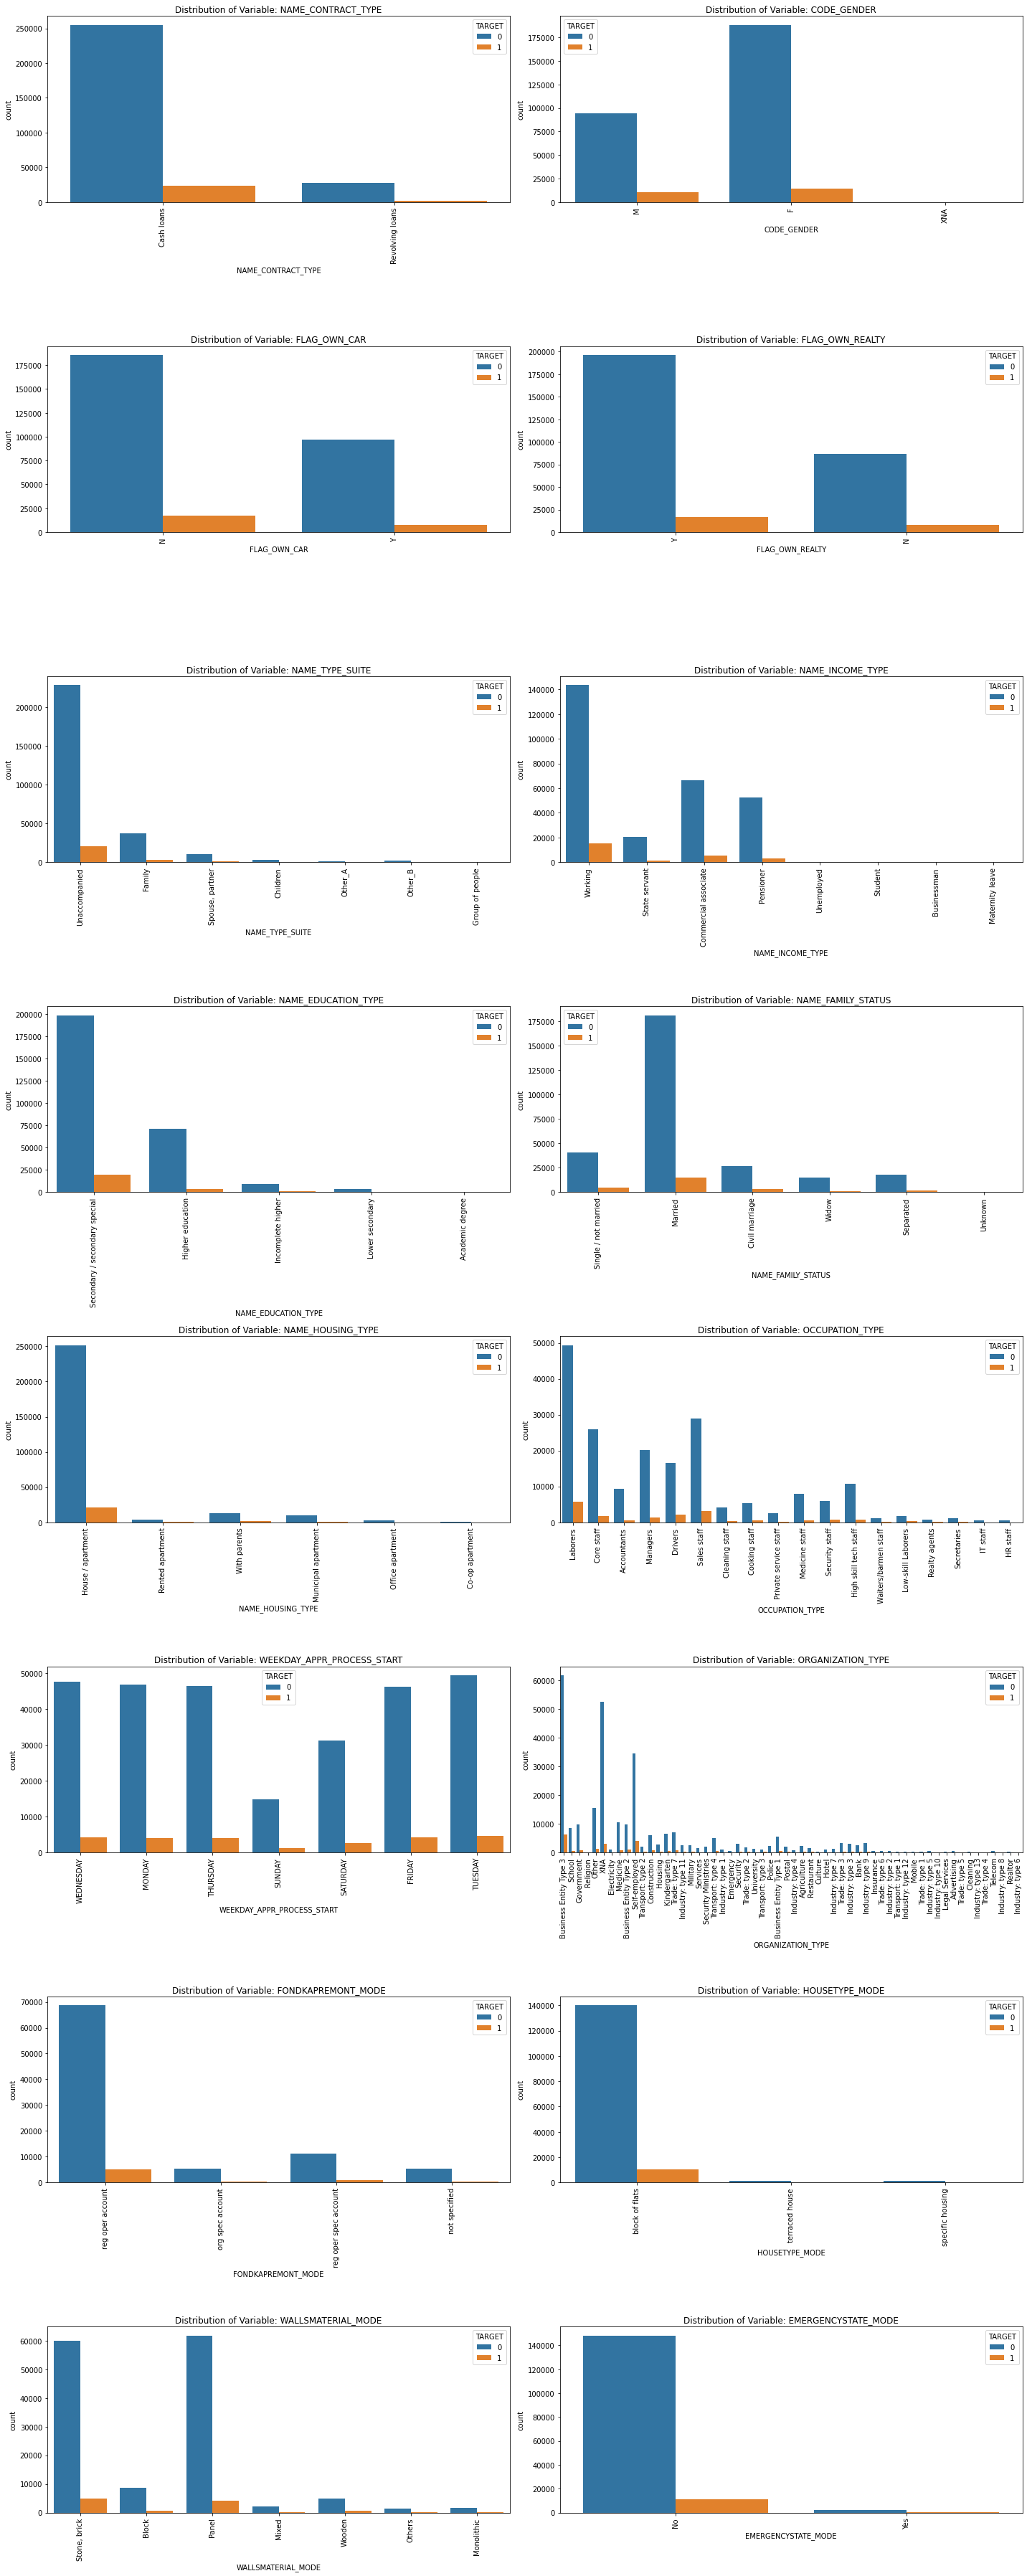

In [19]:
import math
plt.figure(figsize=(10,12)),

fig_rows = math.ceil(selected_cat_features_len/2)
fig, ax = plt.subplots(fig_rows, 2, figsize = (20,50))
col_index = 0
    
for idx, cat in enumerate(selected_cat_features):
    plt.subplot(fig_rows, 2, idx+1)
    sns.countplot(train[cat], hue=train['TARGET'])
    plt.title(f"Distribution of Variable: {cat}")
    plt.xticks(rotation=90)
    plt.tight_layout()

Based on the the above histograms, the following categorical variables will be dropped: 
- 'NAME_TYPE_SUITE' - Who accompanied client when applying for the previous application doesn't really affect ability to pay
- 'NAME_HOUSING_TYPE' - Majority of people live in either house or apartment
- 'WEEKDAY_APPR_PROCESS_START'- Which day of the week a client applied for the loan doesn't really affect ability to pay
- 'FONDKAPREMONT' - Distribution appears similar across all segments
- 'HOUSETYPE_MODE' - Almost all applications are from 'block of flats'
- 'WALLSMATERIAL_MODE' - Almost all wall materials are stone,brick or Panel
- 'EMERGENCYSTATE_MODE' - Almost all applications were not emergency state mode

In [20]:
inputs_to_drop = ['NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 
                  'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

for input_var in inputs_to_drop: 
    selected_cat_features.remove(input_var)
    
print("Updated Categorical Columns based on Histograms of Distributions".upper())    
print("-------------------------------------------------------------------------------------")
for col in selected_cat_features:
    print(col)
    
print(f"\n# of Variables Listed Above Minus: {len(selected_cat_features)}") 

UPDATED CATEGORICAL COLUMNS BASED ON HISTOGRAMS OF DISTRIBUTIONS
-------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
OCCUPATION_TYPE
ORGANIZATION_TYPE

# of Variables Listed Above Minus: 9


### Final Selected Numerical and Categorical Features in Application Training Set

In [21]:
print("Final Features Selected from Application Training Set: ")
print()
print('NUMERICAL FEATURES: ')
print('----------------------')
for col in selected_num_features: 
    print(col)
print(f"\n# of Variables Listed Above: {len(selected_num_features)}") 
print()
print()
print('CATEGORICAL FEATURES: ')
print('----------------------')
for col in selected_cat_features: 
    print(col)
print(f"\n# of Variables Listed Above: {len(selected_cat_features)}") 

Final Features Selected from Application Training Set: 

NUMERICAL FEATURES: 
----------------------
EXT_SOURCE_3
EXT_SOURCE_2
EXT_SOURCE_1
DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY
DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY
FLOORSMAX_AVG
DAYS_REGISTRATION
AMT_GOODS_PRICE
OWN_CAR_AGE
AMT_INCOME_TOTAL

# of Variables Listed Above: 13


CATEGORICAL FEATURES: 
----------------------
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
OCCUPATION_TYPE
ORGANIZATION_TYPE

# of Variables Listed Above: 9


# Baseline Experiments

In [22]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from time import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [23]:
#Table to track experimental results
try:
    expLog
except NameError:

    expLog = pd.DataFrame(columns=["Experiment Number",
                                   "Model",
                                   "# Input Features",
                                   "# Numerical Features",
                                   "# Categorical Features",
                                   "Hyperparameters",
                                   "Best Parameter",
                                   "Best Score",
                                   "Train Acc",
                                   "Valid Acc",
                                   "Test Acc",
                                   "Train F1",
                                   "Valid F1",    
                                   "Test F1",
                                   "Train AUROC",
                                   "Valid AUROC",                                   
                                   "Test AUROC",                                 
                                   "Training Time",
                                   "Training Prediction Time",
                                   "Validation Prediction Time",
                                   "Test Prediction Time",
                                   "Description"])

display(expLog)


,Experiment Number,Model,# Input Features,# Numerical Features,# Categorical Features,Hyperparameters,Best Parameter,Best Score,Train Acc,Valid Acc,...,Valid F1,Test F1,Train AUROC,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Description


In [24]:
def train_model(df, exp_name, num_features, cat_features, pipeline):
    
    features = num_features + cat_features

    # Split data into Train, Test, and Validation Sets
    y = train['TARGET']
    X = train[features]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    print(f"X train           shape: {X_train.shape}")
    print(f"X validation      shape: {X_valid.shape}")
    print(f"X test            shape: {X_test.shape}")
    
    print("\nPERFORMING TRAINING: {exp_name}")
    print("\tPipeline:",[name for name, _ in pipeline.steps])
    print("\t# Total Features: ", len(features))
    
    print("\nNumerical Features:")
    print(num_features)
    print("\t# Numerical Features: ", len(num_features))

    print("\nCategorical Features:")
    print(cat_features)
    print("\t# Categorical Features: ", len(cat_features))

    print('\ntraining in progress...')

    #Fit the baseline pipeline to Training data
    start=time()
    model = pipeline.fit(X_train, y_train)
    train_time = np.round(time() - start, 4)
    print("\nBaseline Experiment with 22 Input Variables - Training Time: %0.3fs" % (train_time))
    
    return features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time

In [25]:
from sklearn.metrics import confusion_matrix
def predict_and_score(X, y, model, model_ID):
    start = time()
    y_pred = model.predict(X)
    pred_time = time() - start
    
    print("\tPrediction Time: %0.3fs" % (pred_time))
    
    acc = accuracy_score(y, y_pred)
    print("\tAccuracy Score: ", acc)
    
    f1 = f1_score(y, y_pred)
    print("\tF1 Score: ", f1)
    
    auroc = roc_auc_score(y, model.predict_proba(X)[:, 1])
    print("\tAUROC Score: ", auroc)
    
    print("\tConfusion Matrix:")
    class_labels = ["0: Repaid","1: Not Repaid"]
    cm = confusion_matrix(y,y_pred).astype(np.float32)
    cm /= cm.sum(axis=1)[:, np.newaxis]
    cm_plot = sns.heatmap(cm, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=13)
    plt.ylabel("True", fontsize=13)
    cm_plot.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title(model_ID, fontsize=13)
    plt.show()

    return (cm, y_pred, pred_time, acc, f1, auroc)

## Data Preprocessing Pipelines

### Level 3 Pipelines

In [26]:
# Pipeline for the numeric features.
# Use StandardScaler() to standardize the data, Missing values will be imputed using the feature mean.
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler(with_mean=False))
])


# Pipeline for the categorical features.
# Entries with missing values or values that don't exist in the range defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value= 'missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


### Level 2 Pipeline

In [27]:
#features_pipeline to combine Numerical and Categorical Pipelines
data_pipeline_22 = ColumnTransformer(
    transformers= [
        ('num', num_pipeline, selected_num_features), 
        ('cat', cat_pipeline, selected_cat_features)],
        remainder='drop',
        n_jobs=-1
    )

# Baseline Experiment
baseline_pipeline_22 = Pipeline([
        ("preparation", data_pipeline_22),
        ("logRegression", LogisticRegression())
    ])

#Name of Experiment
exp_name = "Baseline 1, LogReg with 22 Features"

#Description of Experiments
description = 'Baseline 1 LogReg Model with 13 Num + 9 Cat Features.'

#Start Experiment count for the expLog
exp_count = 1

## Baseline Experiment (Level 1 Pipeline) with 22 Selected Features in application_train


In [28]:
features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, selected_num_features, selected_cat_features, baseline_pipeline_22)

X train           shape: (209107, 22)
X validation      shape: (52277, 22)
X test            shape: (46127, 22)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'logRegression']
	# Total Features:  22

Numerical Features:
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLOORSMAX_AVG', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'AMT_INCOME_TOTAL']
	# Numerical Features:  13

Categorical Features:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
	# Categorical Features:  9

training in progress...

Baseline Experiment with 22 Input Variables - Training Time: 13.309s


### Prediction and Scoring

Baseline Experiment with 22 Variables - Training Set:
	Prediction Time: 2.506s
	Accuracy Score:  0.9198783397973287
	F1 Score:  0.01747595589960122
	AUROC Score:  0.7404631810209428
	Confusion Matrix:


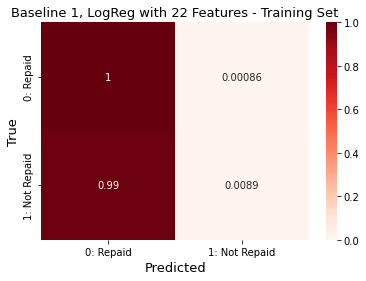

Baseline Experiment with 22 Variables - Validation Set:
	Prediction Time: 0.591s
	Accuracy Score:  0.9164068328327946
	F1 Score:  0.018418688230008987
	AUROC Score:  0.7405900117272861
	Confusion Matrix:


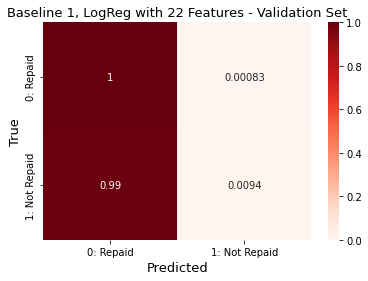

Baseline Experiment with 22 Variables - Test Set:
	Prediction Time: 0.411s
	Accuracy Score:  0.9193097318273462
	F1 Score:  0.016904384574749076
	AUROC Score:  0.739215678811393
	Confusion Matrix:


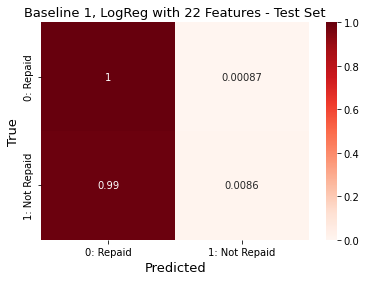

In [29]:
# Training Set
print("Baseline Experiment with 22 Variables - Training Set:")
cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc= predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

# Validation Set
print("Baseline Experiment with 22 Variables - Validation Set:")
cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

# Test Set
print("Baseline Experiment with 22 Variables - Test Set:")
cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc= predict_and_score(X_test, y_test, model, exp_name+' - Test Set')

In [30]:
expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           len(features),
                           len(selected_num_features),
                           len(selected_cat_features),
                           "N/A",
                           "N/A",
                           "N/A",
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                         
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           description]


display(expLog)


exp_count += 1

,Experiment Number,Model,# Input Features,# Numerical Features,# Categorical Features,Hyperparameters,Best Parameter,Best Score,Train Acc,Valid Acc,...,Valid F1,Test F1,Train AUROC,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Description
0,1,"Baseline 1, LogReg with 22 Features",22,13,9,N/A,N/A,N/A,0.92,0.916,...,0.018,0.017,0.74,0.741,0.739,13.309,2.505818,0.590624,0.411006,Baseline 1 LogReg Model with 13 Num + 9 Cat Fe...


## Baseline Experiment (Level 1 Pipeline) with all 120 Input Features in application_train

In [3]:
# Input Features excluding SK_ID_CURR and TARGET
all_num_features = train.describe().columns.to_list()
all_cat_features = set(train.columns.to_list()) - set(all_num_features)
all_cat_features = list(all_cat_features)

all_num_features.remove('SK_ID_CURR') #ID has no effect on ability to repay loans
all_num_features.remove('TARGET') 


# all_app_features = all_num_features + all_cat_features
# total_inputs = len(all_app_features)

NameError: name 'train' is not defined

In [35]:
#features_pipeline to combine Numerical and Categorical Pipelines of all features
data_pipeline_120 = ColumnTransformer(
    transformers= [
        ('num', num_pipeline, all_num_features), 
        ('cat', cat_pipeline, all_cat_features)],
        remainder='drop',
        n_jobs=-1
    )

# Baseline Experiment with 120 Input Vars
baseline_pipeline_120 = Pipeline([
        ("preparation", data_pipeline_120),
        ("logRegression", LogisticRegression())
    ])

#Name of Experiment
exp_name = "Baseline 2, LogReg with 120 Features"

#Description of Experiments
description = 'Baseline 2 LogReg Model with 104 Num + 16 Cat Features.'

In [2]:
features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, all_num_features, all_cat_features, baseline_pipeline_120)

NameError: name 'train_model' is not defined

### Prediction and Scoring

In [1]:
# Training Set
print(f"Baseline Experiment Training Set with {len(features)} Input Features:")
cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

# Validation Set
print(f"Baseline Experiment Validation Set with {len(features)} Input Features:")
cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

# Test Set
print(f"Baseline Experiment Test Set with {len(features)} Input Features:")
cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')

NameError: name 'features' is not defined

In [ ]:
expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           len(features),
                           len(all_num_features),
                           len(all_cat_features),
                           "N/A",
                           "N/A",
                           "N/A",
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                         
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           description]

display(expLog)

exp_count += 1

## Baseline Experiment with all Input Features New Debt_to_Income_Ratio Feature

In [31]:
# All 120 Input Features Plus New Feature Transformation in Pipeline: Debt-to-Income Ratio

from sklearn.base import BaseEstimator, TransformerMixin

class Debt_to_Income_Ratio(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X.copy(), columns=self.features)  # select a subset of columns in X based on self.features 

        feature1 = 'AMT_CREDIT'
        feature2 = 'AMT_INCOME_TOTAL'
        
        #Create new column for debt-to-income ratio
        df['DEBT_TO_INCOME_RATIO'] = df[feature1] / df[feature2] 
        
        #Drop the features that were initially passed
        df.drop(feature1, axis=1, inplace=True)
        df.drop(feature2, axis=1, inplace=True)
        
        #Return df
        return df
    
    
test_pipeline = make_pipeline(Debt_to_Income_Ratio())
debt_income_ratio = test_pipeline.fit_transform (X_train[['AMT_CREDIT', 'AMT_INCOME_TOTAL']])
display(pd.DataFrame(np.c_[X_train[['AMT_CREDIT', 'AMT_INCOME_TOTAL']],debt_income_ratio], columns=['AMT_CREDIT', 'AMT_INCOME_TOTAL'] + ["DEBT_INCOME_RATIO"]) ) 



KeyError: "['AMT_CREDIT'] not in index"

In [34]:
data_pipeline_DIR = ColumnTransformer( 
    transformers= [
        # (name, transformer,     columns)
        ('num', num_pipeline, all_num_features),
        ('cat', cat_pipeline, all_cat_features),
        ('DIR', make_pipeline(Debt_to_Income_Ratio(), StandardScaler()), ['AMT_CREDIT', 'AMT_INCOME_TOTAL'])
          
    ],
        remainder='drop',
        n_jobs=-1
    )

X_train_transformed = data_pipeline_DIR.fit_transform(X_train)
column_names = all_num_features  + \
               list(data_pipeline_DIR.transformers_[1][1].named_steps["onehot"].get_feature_names(all_cat_features)) +\
                ['DEBT_TO_INCOME_RATIO']

display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FONDKAPREMONT_MODE_missing,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,DEBT_TO_INCOME_RATIO
0,2.763729,1.355273,1.339199,2.022258,1.459046,1.496970,-2.541537,-0.020777,-1.388585,-1.504414,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.077059
1,1.381865,2.117614,4.370030,3.208587,4.255552,1.778614,-2.978958,-0.021845,-0.473084,-2.666495,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.437253
2,0.000000,1.270568,0.401090,0.785916,0.364762,0.733344,-5.520724,2.583799,-3.407287,-2.883019,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.023874
3,0.000000,0.635284,0.669600,0.961737,0.729523,2.222725,-4.295578,-0.034366,-2.235083,-1.503752,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.015694
4,0.000000,1.905853,3.425158,2.630799,3.258537,2.222725,-2.070415,-0.010463,-1.092978,-0.992569,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.062055


In [35]:
# Baseline Experiment with 120 Input Vars
baseline_pipeline_DIR = Pipeline([
        ("preparation", data_pipeline_DIR),
        ("logRegression", LogisticRegression())
    ])

#Name of Experiment)
exp_name = "Baseline 3, LogReg with Debt_Income_Ratio"

#Description of Experiments
description =" Logistic Regression Model with Num and Cat Features + Debt-Income-Ratio."


In [36]:

features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, all_num_features, all_cat_features, baseline_pipeline_DIR)

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'logRegression']
	# Total Features:  120

Numerical Features:
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLO

Baseline Experiment Training Set with 121 Input Features:
	Prediction Time: 1.771s
	Accuracy Score:  0.9198352996312893
	F1 Score:  0.020566754309085597
	AUROC Score:  0.745377115010172
	Confusion Matrix:


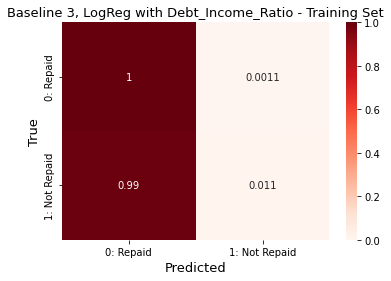

Baseline Experiment Validation Set with 121 Input Features:
	Prediction Time: 0.491s
	Accuracy Score:  0.9161198997647149
	F1 Score:  0.01791713325867861
	AUROC Score:  0.745678887684447
	Confusion Matrix:


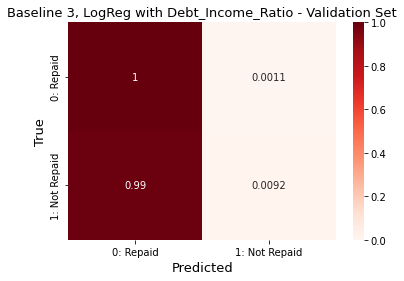

Baseline Experiment Test Set with 121 Input Features:
	Prediction Time: 0.508s
	Accuracy Score:  0.9192013354434496
	F1 Score:  0.02255441909257802
	AUROC Score:  0.7430450227188286
	Confusion Matrix:


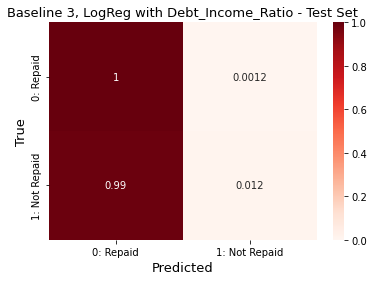

In [37]:
# Training Set
print(f"Baseline Experiment Training Set with 121 Input Features:")
cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

# Validation Set
print(f"Baseline Experiment Validation Set with 121 Input Features:")
cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

# Test Set
print(f"Baseline Experiment Test Set with 121 Input Features:")
cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')

In [38]:
expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           len(features)+1,
                           len(all_num_features)+1,
                           len(all_cat_features),
                           "N/A",
                           "N/A",
                           "N/A",
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc, 3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1, 3),
                           round(train_auroc, 3),                          
                           round(valid_auroc, 3),                                                     
                           round(test_auroc,3),                           
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           description]

display(expLog)

exp_count += 1

,Experiment Number,Model,# Input Features,# Numerical Features,# Categorical Features,Hyperparameters,Best Parameter,Best Score,Train Acc,Valid Acc,...,Valid F1,Test F1,Train AUROC,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Description
0,1,"Baseline 1, LogReg with 22 Features",22,13,9,N/A,N/A,N/A,0.92,0.916,...,0.018,0.017,0.740,0.741,0.739,5.3677,1.274050,0.723603,0.294824,Baseline 1 LogReg Model with 13 Num + 9 Cat Fe...
1,2,"Baseline 2, LogReg with 120 Features",120,104,16,N/A,N/A,N/A,0.92,0.916,...,0.020,0.024,0.746,0.746,0.743,11.7291,1.894441,0.493320,0.491774,Baseline 2 LogReg Model with 104 Num + 16 Cat ...
2,3,"Baseline 3, LogReg with Debt_Income_Ratio",121,105,16,N/A,N/A,N/A,0.92,0.916,...,0.018,0.023,0.745,0.746,0.743,11.6121,1.771480,0.491152,0.508347,Logistic Regression Model with Num and Cat Fe...


# Other Experiments Using 22 Selected Input Features: 

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
clf_names = ["Random Forest",
#              "SVC"
]

clfs = [RandomForestClassifier(n_jobs=-1, class_weight='balanced'),
#       SVC()
]

for clf_name, clf in zip(clf_names, clfs): 
    
    print("-----------------------------------------------------")
    print(f"{clf_name.upper()}")
    print("-----------------------------------------------------")
    pipe = Pipeline([
        ("preparation", data_pipeline_22),
        ("clf", clf),
    ])
    
    # Name of Experiment
    exp_name = clf_name +" with 22 Features"
    
    # Description of Experiment
    description = f'{clf_name} Model with 13 Num + 9 Cat Features.'
    
    features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, selected_num_features, selected_cat_features, pipe)
    
    
    # Training Set
    print("Baseline Experiment with 22 Variables - Training Set:")
    cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

    # Validation Set
    print("Baseline Experiment with 22 Variables - Validation Set:")
    cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

    # Test Set
    print("Baseline Experiment with 22 Variables - Test Set:")
    cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')
    
    expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           len(features),
                           len(selected_num_features),
                           len(selected_cat_features),
                           "N/A",
                           "N/A",
                           "N/A",
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                               
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           description]
    exp_count += 1
    

    
display(expLog)

-----------------------------------------------------
RANDOM FOREST
-----------------------------------------------------


NameError: name 'Pipeline' is not defined

# Hyperparameter Tuning

In [42]:
clf_best_parameters = {}

# Function to run GridSearchCV and log experiments
def gs_classifier(selected_features, clf_name, clf, parameters):
    y = train['TARGET']
    X = train[selected_features]
    total_selected_inputs = len(selected_features)
    
    numerical_features = X.describe().columns.to_list()
    total_num_inputs = len(numerical_features)
    
    categorical_features = set(X.columns.to_list()) - set(numerical_features)
    categorical_features = list(categorical_features)
    total_cat_inputs = len(categorical_features)
    
       
    description = f'{clf_name} with {total_selected_inputs}'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    print(f"X train           shape: {X_train.shape}")
    print(f"X validation      shape: {X_valid.shape}")
    print(f"X test            shape: {X_test.shape}")
    
    
    data_pipeline = ColumnTransformer(transformers=[
            ("num_pipeline", num_pipeline, numerical_features),
            ("cat_pipeline", cat_pipeline, categorical_features)],
            remainder='drop',
            n_jobs=-1
        )
    
    clf_pipeline = Pipeline([
            ("preparation", data_pipeline),# combination of numerical, categorical subpipelines
            ("clf", clf)  # classifier estimator you are using
        ])

    gs = GridSearchCV(clf_pipeline,
                      parameters,
                      scoring=['f1','roc_auc'],
                      cv=3,
                      refit='roc_auc',
                      n_jobs=-1,
                      verbose=1)

    print("\nPERFORMING GRID SEARCH FOR {}...".format(clf_name.upper()))
    print("\tpipeline:",[name for name, _ in clf_pipeline.steps])
    print("\tparameters:", parameters)
    print()

    start = time()
    gs.fit(X_train, y_train)
    train_time = time() - start
    print("\tTraining Time: %0.3fs" % (time() - start))
    print()
    exp_count = 1
    # Training Set
    print(f"{clf_name} Training Set with {total_selected_inputs} Input Features:")
    cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

    # Validation Set
    print(f"{clf_name} Validation Set with {total_selected_inputs} Input Features:")
    cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

    # Test Set
    print(f"{clf_name} Experiment Test Set with {total_selected_inputs} Input Features:")
    cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')


    print("\n\tBest score: %0.3f" % gs.best_score_)
    print("\tBest parameters set:")
    best_parameters = gs.best_estimator_.get_params()

    best_parameters_dict = {}
    for param_name in sorted(parameters.keys()):
        print("\t\t%s: %r" % (param_name, best_parameters[param_name]))
        best_parameters_dict[param_name] = best_parameters[param_name]
        clf_best_parameters[clf_name] = best_parameters_dict    
    print()
    print()

    
    expLog.loc[len(expLog)] = [exp_count, 
                           clf_name, 
                           total_selected_inputs,
                           total_num_inputs,
                           total_cat_inputs,
                           parameters,
                           best_parameters_dict,
                           round(gs.best_score_,3),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc, 3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1, 3),
                           round(train_auroc, 3),                          
                           round(valid_auroc, 3),                                                     
                           round(test_auroc,3), 
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           description]
    
    exp_count += 1

In [ ]:
# Grid Search over Preparation Pipeline and Classifiers

clf_names = [#"Gaussian Naive Bayes", 
            "Logistic Regression", 
#             "SVC"
]

clfs = [#GaussianNB(),
             LogisticRegression(),
#              SVC()
]

param_grids = [#{'clf__var_smoothing': [1e-9, 1e-7, 1e-5]},
              {'clf__C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e5,]},
#               {'clf__C': [0.001, 0.01, 0.1, 1.], 
#                'clf__kernel': ["linear", "poly", "rbf", "sigmoid"],
#                'clf__gamma':["scale", "auto"]}
]


selected_features = selected_num_features + selected_cat_features
               
for clf_name, clf, parameters in zip(clf_names, clfs, param_grids): 
    gs_classifier(selected_features, clf_name, clf, parameters)

X train           shape: (209107, 22)
X validation      shape: (52277, 22)
X test            shape: (46127, 22)

PERFORMING GRID SEARCH FOR LOGISTIC REGRESSION...
	pipeline: ['preparation', 'clf']
	parameters: {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100000.0]}

Fitting 3 folds for each of 7 candidates, totalling 21 fits


In [36]:
display(expLog)

,Experiment Number,Model,# Input Features,# Numerical Features,# Categorical Features,Hyperparameters,Best Parameter,Best Score,Train Acc,Valid Acc,...,Valid F1,Test F1,Train AUROC,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Description
0,1,"Baseline 1, LogReg with 22 Features",22,13,9,N/A,N/A,N/A,0.92,0.916,...,0.018,0.017,0.74,0.741,0.739,13.3090,2.505818,0.590624,0.411006,Baseline 1 LogReg Model with 13 Num + 9 Cat Fe...
1,2,Random Forest with 22 Features,22,13,9,N/A,N/A,N/A,1.00,0.916,...,0.001,0.001,1.00,0.726,0.723,483.2943,11.731576,7.612208,1.945273,Random Forest Model with 13 Num + 9 Cat Features.


In [38]:
# Function Build Barcharts of scores for all models
acc_df = expLog[['Model', 'Train Acc', 'Valid Acc', 'Test Acc']].copy()
F1_df = expLog[['Model','Train F1', 'Valid F1', 'Test F1']].copy()
AUROC_df = expLog[['Model','Train AUROC', 'Valid AUROC', 'Test AUROC']].copy()

def score_barchart(df, title):
    # Plot the bar chart
    df.set_index('Model', inplace=True)
    ax = df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{title} Score Comparison')
    plt.ylabel(title)
    plt.xticks(rotation=45)
    plt.show()


# Write-up 
## ML Pipelines 
The pipelines used in this project were used to increase the efficiency and ease of understanding of our code. Our most basic pipelines (Level 3 Pipelines) were used to prepare our selected input feature data. The numerical features and categorical features were each handled in their own pipelines. Numerical data was standardized while categorical data was one-hot-encoded. In both sets, the pipelines handled imputing missing values. The Level 2 Pipeline, was a column transformer used to streamline the preparation of data before it is applied to our classifier, combining both numerical and categorical pipelines. Lasty, the Level 1 Pipeline was used to combine the Level 2 data preparation pipeline to the classifer model. 

Our baseline pipelines: 
- Logistic Regression model with 22 selected input features from application_train. 
- Logistic Regression model with all 120 input features from aplication train (does not include SK_ID_CURR). 

Our other experiments used a clf_pipeline which combined the data prepration pipeline with the following classifier models using varying selected features: 
- Logistic Regression 
- Random Forest
- Gaussian Naive Bayes
- SVC 

Using the application_train dataset, we also feature engineered a new input feature, Debt to Income Ratio using features 'AMT_CREDIT' and 'AMT_INCOME TOTAL'. Debt to Income Ratio is a good measure of ability to pay back loans, showing how much of a person's income will go out to pay debt. According to Wells Fargo.com (https://www.wellsfargo.com/goals-credit/smarter-credit/credit-101/debt-to-income-ratio/understanding-dti/#:~:text=35%25%20or%20less%3A%20Looking%20Good,a%20lower%20DTI%20as%20favorable.), A Debt-to-Income Ratio of 35% of less is considered good, 36-49% shows room for improvement, and over 50% show a need to take action.

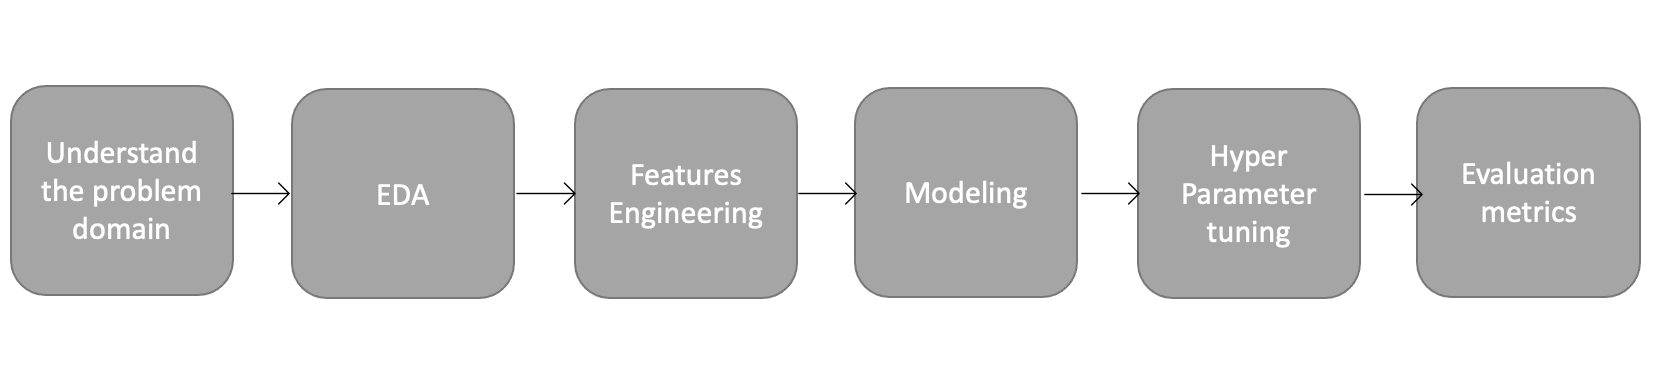

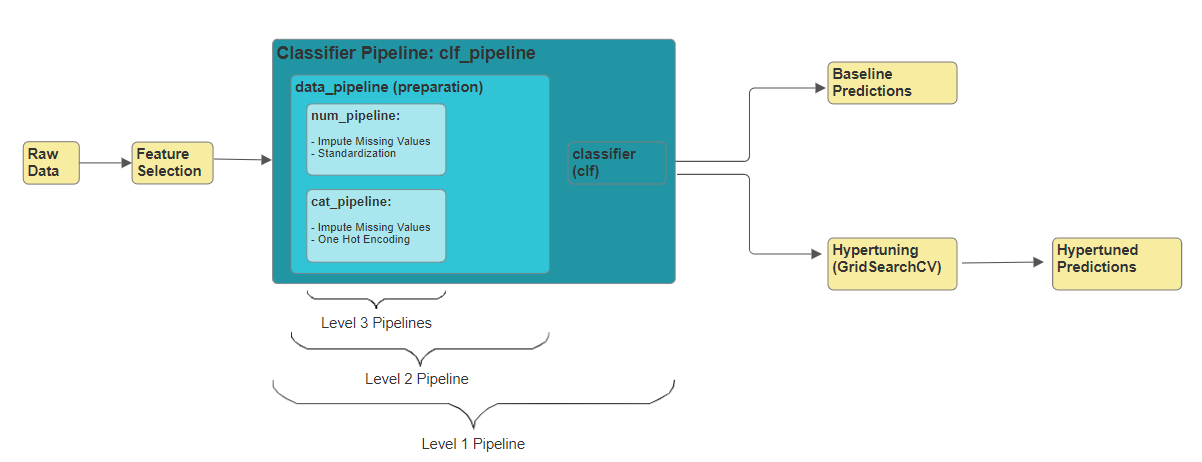

## Loss Functions

**Logistic function**

$$ \sigma(t) = \dfrac{1}{1 + \exp(-t)} $$ 


**Logistic Regression model prediction**

$$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$$


**Cost function of a single training instanc**

$$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$$


**Binary Cross-Entropy Loss (CXE)**

Binary Cross Entropy loss, aka log loss, is a special case of negative log likelihood. It measures a classifier's performance, increases as the predicted probability moves farther from the true label. The goal in logistic regression is to minimize the CXE. 
 $$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$$


**LASSO Binary Cross Entropy (LBXE)** 
$$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}  + \lambda \sum_{j=1}^{n}|w_j|
$$


**Ridge Binary Cross Entropy (RBXE)** 
$$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]} + \lambda \sum_{j=1}^{n}w_j^2
$$


**Primal Soft Margin SVM Classifier**
$$ {\displaystyle \underset{W,b, \zeta}{\text{argmin }}{\overbrace{\dfrac{1}{2}}^A \underbrace{\mathbf{w}^T \cdot \mathbf{w}}_B \quad + }C\sum _{i=1}^{m}\zeta _{i}} $$
$$ {\displaystyle \\ {\text{subject to }}  y_{i}(w\cdot x_{i}-b)\geq 1-\zeta _{i}\,{\text{ and }}\,\quad (4.1) \\ \zeta _{i}\geq 0,\,{\text{for all }}}{\displaystyle i\in \{1,\,\ldots ,\,m\}} $$ 

## Evaluation Metrics

###  Accuracy Score 
$$ \text{Accuracy} = \cfrac{TP + TN}{TP + TN + FP + FN} $$


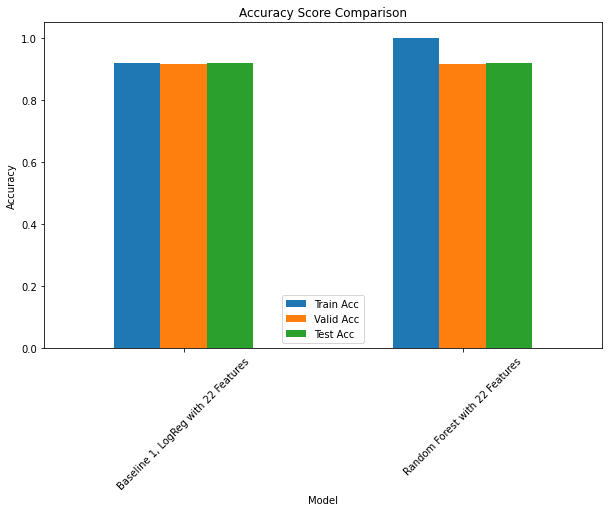

In [39]:
score_barchart(acc_df, "Accuracy")

### F1 Score

$$ \text{precision} = \cfrac{TP}{TP + FP} $$


$$\text{recall} = \cfrac{TP}{TP + FN}$$

<br>
$$
F_1 = \cfrac{2}{\cfrac{1}{\text{precision}} + \cfrac{1}{\text{recall}}} = 2 \times \cfrac{\text{precision}\, \times \, \text{recall}}{\text{precision}\, + \, \text{recall}} = \cfrac{TP}{TP + \cfrac{FN + FP}{2}}
$$



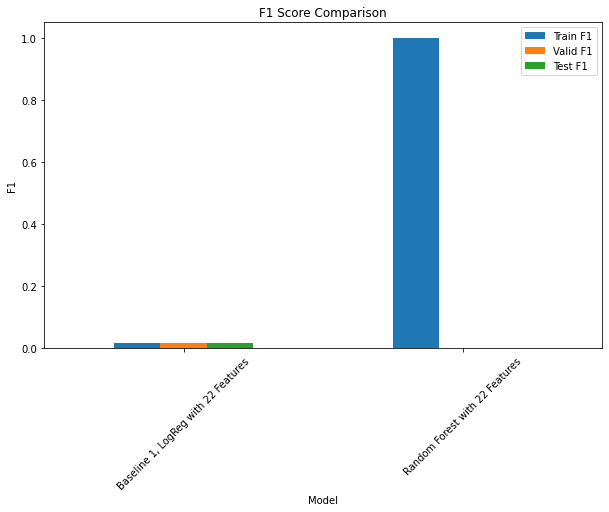

In [40]:
score_barchart(F1_df, "F1")

### Area Under the Receiver Operating Characteristics (AUROC)

$$\text{TPR (aka recall or specificity)} = \cfrac{TP}{TP + FN}$$


<br>
$$ \text{Specificity} = \cfrac{TN}{TN + FP} $$


<br>
$$ \text{FPR = 1 - Specificity}  = \cfrac{FP}{TN + FP} $$

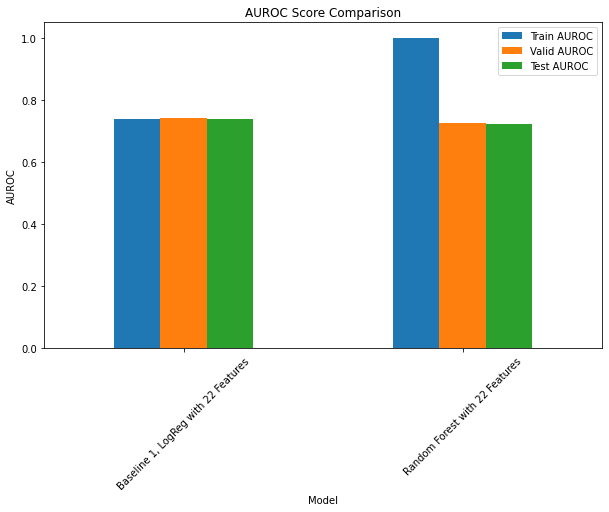

In [41]:
score_barchart(AUROC_df, "AUROC")

**References:** 
- "List Highest Correlation Pairs from a Large Correlation Matrix in Pandas?". Asked July 22, 2013 by Kyle Brandt. 
    Stack Overflow, "https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas".  <br>
    Answered January 3, 2017 by Arun. Licensed under Creative Commons. <br>
    
    
- " What is a Good Debt-to-Income Ratio?". Accessed 11/20/2023. 
    Wellsfargo.com, (https://www.wellsfargo.com/goals-credit/smarter-credit/credit-101/debt-to-income-ratio/understanding-dti/#:~:text=35%25%20or%20less%3A%20Looking%20Good,a%20lower%20DTI%20as%20favorable.)<br>
    